To deploy the model via a REST API we follow https://blog.keras.io/ using code from https://github.com/jrosebr1/simple-keras-rest-api

In this notebook I just illustrate the functionality of `run_keras_server_sat.py`

In [1]:
ls

Deploy model via REST API 17-4-2018.ipynb
LICENSE
README.md
resources/
tensorflow/


In [17]:
from PIL import Image
import os
import io
import numpy as np
from keras.applications import ResNet50
from keras.applications import imagenet_utils
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
from resources.run_keras_server_sat import prepare_image

In [6]:
raw_image_path = "resources/sat_image.jpg"
raw_image = Image.open(raw_image_path)

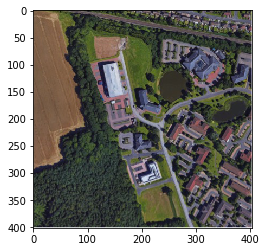

In [7]:
plt.imshow(np.asarray(raw_image));

## ResNet
The example online uses the [ResNet50 model](https://www.kaggle.com/keras/resnet50).
First test the performance of this model.

In [8]:
%%time
model = ResNet50(weights="imagenet")

CPU times: user 6.29 s, sys: 365 ms, total: 6.66 s
Wall time: 6.49 s


In [9]:
processed_image = prepare_image(raw_image, target=(224, 224)) # ResNet requires 224, 224

In [10]:
processed_image.shape

(1, 224, 224, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


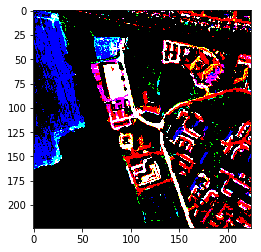

In [11]:
plt.imshow(processed_image[0, :, :, :]);

In [12]:
%%time
preds = model.predict(processed_image)

CPU times: user 1.31 s, sys: 64.2 ms, total: 1.38 s
Wall time: 819 ms


In [13]:
results = imagenet_utils.decode_predictions(preds)

In [14]:
results

[[('n03598930', 'jigsaw_puzzle', 0.95966166),
  ('n03733281', 'maze', 0.0052570174),
  ('n06596364', 'comic_book', 0.0031103743),
  ('n09246464', 'cliff', 0.0021459502),
  ('n02978881', 'cassette', 0.0014450098)]]

In [15]:
data = {}
data["predictions"] = []

for (imagenetID, label, prob) in results[0]:
    r = {"tag": label, "confidence": float(prob)}
    data["predictions"].append(r)
data["success"] = True

In [16]:
data

{'predictions': [{'label': 'jigsaw_puzzle', 'probability': 0.9596616625785828},
  {'label': 'maze', 'probability': 0.005257017444819212},
  {'label': 'comic_book', 'probability': 0.0031103743240237236},
  {'label': 'cliff', 'probability': 0.0021459502167999744},
  {'label': 'cassette', 'probability': 0.0014450098387897015}],
 'success': True}

## Retrained MobileNet_v2
Now demonstrate the model we retrained.

In [18]:
model_path = "tensorflow/mobilenet_v2/output_graph.pb"
file_size = int(os.stat(model_path).st_size/1e6)
print("The generated model (`.pb`) file is {} MB".format(file_size))

The generated model (`.pb`) file is 9 MB
